<a href="https://colab.research.google.com/github/annefrancine/DataScience_Estiam/blob/main/Introduction_%C3%A0_tensorflow_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

documentation : https://www.tensorflow.org/api_docs

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


## Chargement des données et preprocessing

La base Fashion MNIST est une base constituée par Zalando, elle est disponible directement sur Tensorflow.

La base comprend 60 000 images pour entraîner notre modèle et 10 000 pour le tester. Les images sont de très basse résolution, elles ont une taille de 28 par 28. Cela permet d’accélérer l’entrainement du modèle.

In [2]:
# Importez et chargez les données Fashion MNIS
fashion_mnist = tf.keras.datasets.fashion_mnist

(images_train, targets_train), (images_test, targets_test) = tf.keras.datasets.fashion_mnist.load_data()

print(images_train.shape)
print(targets_train.shape)

(60000, 28, 28)
(60000,)


## Prétraiter les données

Les données doivent être prétraitées avant d'entraîner le réseau. Si vous inspectez la première image de l'ensemble d'apprentissage, vous verrez que les valeurs de pixels sont comprises entre 0 et 255 :

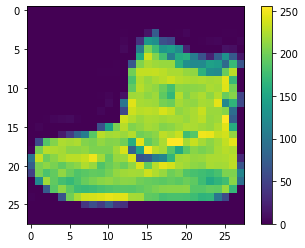

In [4]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Les images sont des tableaux NumPy 28x28, avec des valeurs de pixel allant de 0 à 255. Les étiquettes sont un tableau d'entiers, allant de 0 à 9. Celles-ci correspondent à la classe de vêtements que l'image représente :

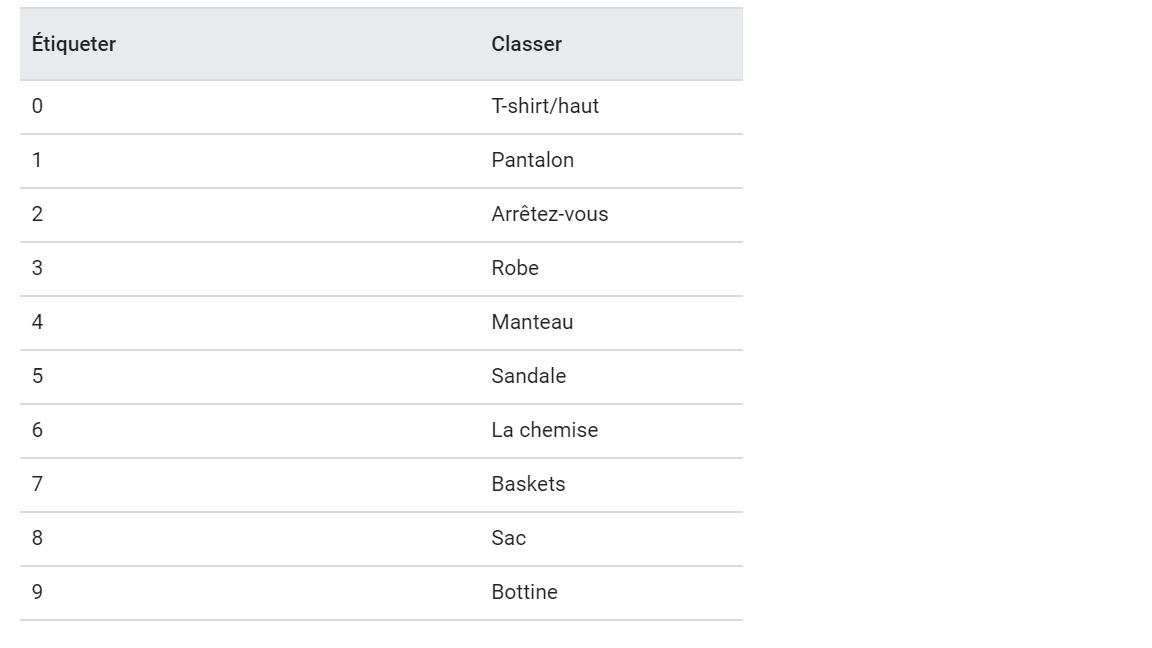

In [5]:
#On commence par définir les noms des catégories :

targets_names = ["T-shirt", "Pantalon", "Pull", "Robe", "Manteau", "Sandale", 
"Chemise", "Sneaker", "Sac", "Bottes"]

On peut alors tracer le diagramme qui nous donne la répartition d’images selon ces catégories.

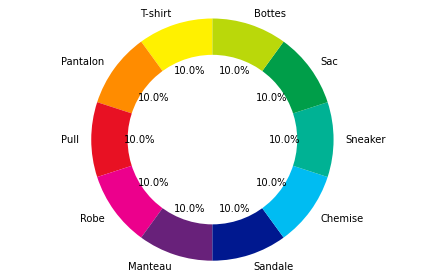

In [6]:
# Noms des catégories et fréquences d'apparitions

labels = targets_names
sizes = np.unique(targets_train,return_counts=True)[1]

# Choix des couleurs

colors =['#fff100','#ff8c00','#e81123','#ec008c','#68217a',    '#00188f',
'#00bcf2','#00b294','#009e49','#bad80a']
 
# Construction du diagramme et affichage des labels et des #fréquences en pourcentage

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

# Tracé du cercle au milieu

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Affichage du diagramme

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Construction du premier modèle avec Tensorflow

Commençons par construire un premier modèle très simple.

On prend un réseau de neurones avec deux couches cachées. La première comportera 256 neurones, la seconde en comportera 128.

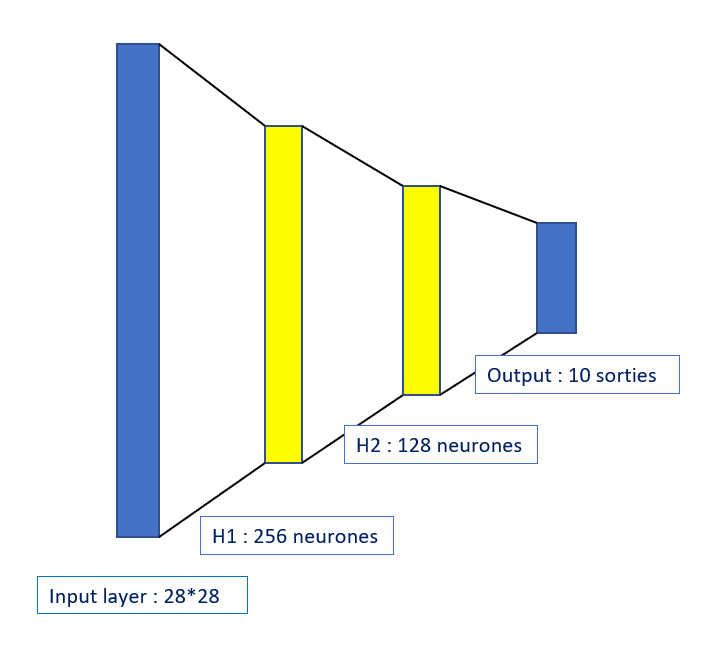

La couche d’entrée sera constituée de 784 neurones. On a des images de taille 28*28, on doit transformer l’image (qui est à la base une matrice) en un vecteur colonne de taille 784. Tous les neurones de ce réseau sont connectés entre eux.

La seconde couche contient 256 neurones. Il n’y a pas de raisons particulière à ce choix. Des techniques d’optimisation des hyper-paramètres existent, mais pour ce projet elles ne sont pas nécessaires.

De même pour la seconde couche, je n’ai pas d’explications pour le choix du nombres de neurones. Il est d’usage d’essayer plusieurs architectures et de les comparer. Cela permet de construire un bon modèle de façon empirique.

En revanche pour la couche de sortie, les 10 neurones correspondent aux valeurs des probabilités d’être dans une certaine classe. Si on avait 5 classes on aurait mis 5 neurones.

## Construction avec Tensorflow

On peut commencer à coder. Vous verrez qu’avec Keras c’est vraiment très facile.

In [7]:
# On converti nos valeurs en float

images_train = images_train.astype(float)
images_test = images_test.astype(float)

# On normalise les pixels pour avoir des valeurs entre 0 et 1

images_train = images_train/255
images_test = images_test/255

In [9]:
# On commence toujours par créer un modèle de type Sequential.
model = tf.keras.models.Sequential()

On crée une première couche qui va permettre d’aplatir la matrice. C’est à dire la transformer en vecteur. 


In [10]:
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

(Opération d’aplanissement de la matrice de pixels)

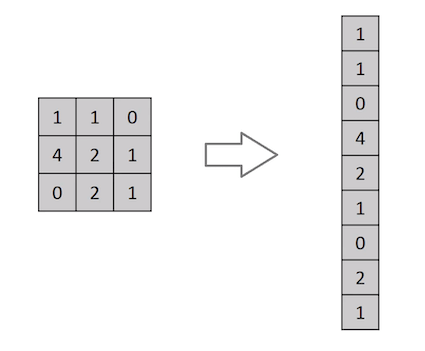

On construit maintenant nos 2 couches cachées et la couche de sortie. Le paramètre activation correspond à la fonction d’activation choisie. 

--------------------------------------------------------------------------------


## Qu’est-ce qu’une fonction d’activation ?

La fonction d’activation sert avant tout à modifier de manière non-linéaire les données. Cette non-linéarité permet de modifier spatialement la représentation des données.

Dit simplement, la fonction d’activation permet de changer notre manière de voir une donnée.

Par exemple si on a comme donnée : chaque semaine 50% des clients d’un magasin achètent des barres de chocolat; la fonction d’activation permettrait de changer la donnée en 50% des clients aiment le chocolat ou encore, 50% des clients prévoient d’acheter du chocolat chaque semaine.

Le changement de représentation peut, dans notre exemple, nous permettre d’ajuster la stratégie commercial, ou bien les stocks possédés, de notre magasin.

Un modèle étant composé de multiples couches, et donc de multiples fonctions d’activation, des changements successifs et complexes de représentation s’opèrent. Cela permet d’avoir un nouveau point de vue sur nos données que l’homme serait incapable d’avoir en peu de temps.

Il ne faut pas confondre fonction d’activation et loss function. La loss function est appliqué sur tous le modèle et.. est donc unique, elle permet de calculer la performance du modèle.

Au contraire la fonction d’activation est spécifique à chaque couche, elle permet de transformer les données.

La particularité de cette fonction d’activation est qu’elle est non-linéaire. Cette non-linéarité permet de changer la représentation des données, d’avoir un nouvelle approche sur ces données. Ce changement de représentation ne serait pas possible avec une transformation linéaire.

Chaque neurone d’une couche va appliquer la fonction d’activation de la couche sur les données. Cette transformation sera différente selon chaque neurone car chacun possède un poids différent.

## Les différentes fonctions d’activation
En Python, les fonctions d’activation s’utilisent avec Activation(activations.fonction_d_activation), un exemple avec la fonction relu :



```
from tensorflow.keras import layers
from tensorflow.keras import activations

model.add(layers.Dense(64))
model.add(layers.Activation(activations.relu))
```



La fonction d’activation peut aussi s’utiliser directement quand on appelle la couche de neurones (layers):



```
model.add(layers.Dense(64, activation='relu'))
```
Selon le problème à résoudre (classification, régression, …) on utilise des fonction d’activations différentes.

Pour choisir la bonne fonction d’activation il faut à la fois considérer la transformation direct qu’elle applique aux données mais aussi sa dérivé qui sera utilisé pour ajuster les poids lors de la backpropagation.


## ReLU
La fonction Rectified Linear Unit (ReLU) est la fonction d’activation la plus simple et la plus utilisée.

Elle donne x si x est supérieur à 0, 0 sinon. Autrement dit, c’est le maximum entre x et 0 :

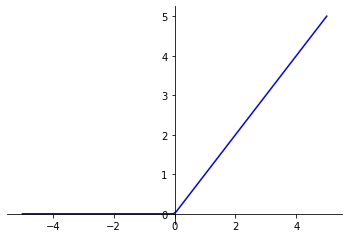

Cette fonction permet d’effectuer un filtre sur nos données. Elle laisse passer les valeurs positives (x > 0) dans les couches suivantes du réseau de neurones. Elle est utilisée presque partout mais surtout pas dans la couche final, elle est utilisée dans les couches intermédiaires.



```
tf.keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0) 
```
- x : donnée d’entrée, tenseur
- alpha : Un nombre réel qui régit la pente pour les valeurs inférieures au seuil.
- max_value : Un nombre réel qui définit le seuil de saturation (la plus grande - valeur que la fonction retournera).
- threshold : Un nombre réel qui donne la valeur seuil de la fonction d’activation en dessous de laquelle les valeurs seront amorties ou mises à zéro


## Sigmoid

La fonction Sigmoïde donne une valeur entre 0 et 1, une probabilité. Elle est donc très utilisée pour les classification binaire, lorsqu’un modèle doit déterminer seulement deux labels.

Ainsi, pour la classification des critiques de cinéma, plus la valeur retourné par Sigmoïde est proche de 1 plus le modèle considère que la critique est positive.

Au contraire, plus elle est proche de 0, plus elle est considérée comme négative.

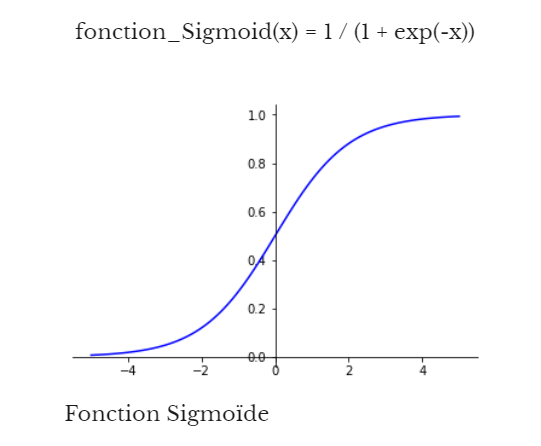

La fonction Sigmoïde est très simple a appliqué en Python car il n’y a pas de paramètre autre que la variable d’entrée :



```
tf.keras.activations.sigmoid(x)
```



## Softmax

La fonction Softmax permet elle de transformer un vecteur réel en vecteur de probabilité.

On l’utilise souvent dans la couche finale d’un modèle de classification, notamment pour les problèmes multiclasse.

Dans la fonction Softmax, chaque vecteur est traité indépendamment. L’argument axis définit l’axe d’entrée sur lequel la fonction est appliquée.

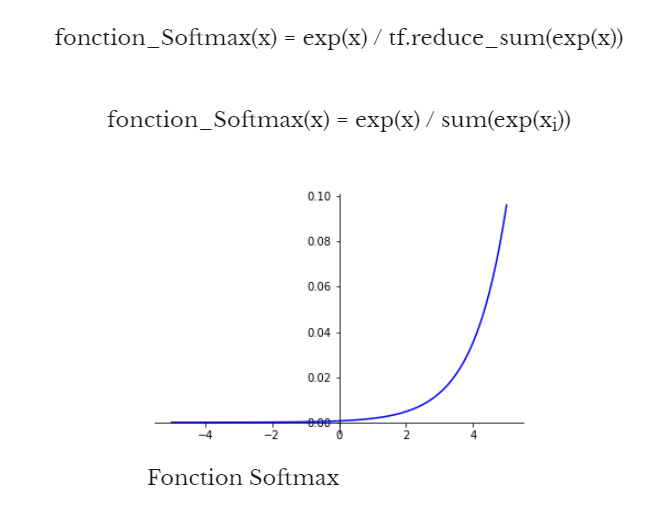

```
tf.keras.activations.softmax(x, axis=-1)
```
- axis : Nombre entier, axe le long duquel la normalisation softmax est appliquée.


## Softplus

La fonction Softplus est une approximation ‘lisse’ de la fonction ReLU. Cet aspect ‘lisse‘ (ou soft) implique que la fonction est différentiable.

En fait, cette fonction est intéressante par sa dérivée. Quand on dérive Softplus, on obtient la fonction logistique f(x) = 1/(1+exp(-x)). On rappelle que la dérivée est utilisée lors de la Backpropagation pour mettre à jour les poids.

Elle était utilisée pour contraindre le résultat d’une couche à être toujours positif mais a été remplacé par ReLU qui est linéaire et donc beaucoup plus rapide à calculer.



```
tf.keras.activations.softplus(x)
```


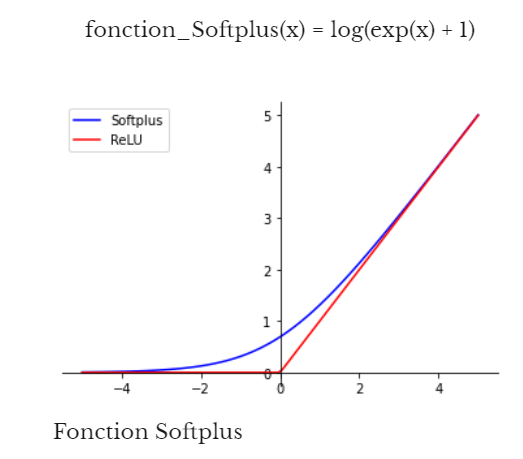

## Softsign

La fonction Softsign est utile pour normaliser nos données car elle permet d’avoir un résultat entre -1 et 1 et garde en mémoire le signe des données (positif ou négatif). Autrement dit, les données sont recentrées sur zéro et bornées par -1 et 1.

En fait, c’est la fonction signe lissé (Softsign) et donc différentiable (Backpropagation oblige).



```
tf.keras.activations.softsign(x) 
```

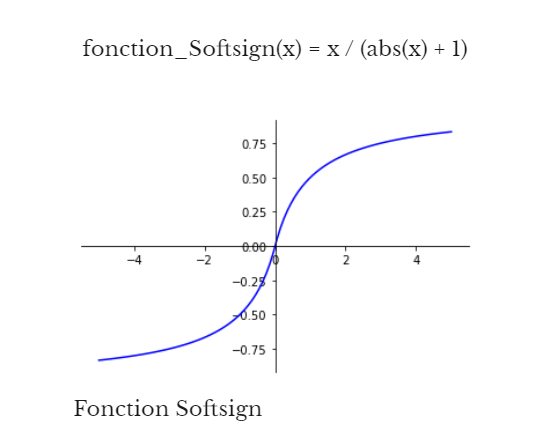

## tanh
La fonction tanh est simplement la fonction de la tangente hyperbolique.

Il s’agit en fait d’une version mathématiquement décalée de la fonction sigmoïde :

sigmoïde donne un résultat entre 0 et 1
tanh donne un résultat entre -1 et 1
L’avantage de tanh est que les entrées négatives seront bien répertoriées comme négatives là où, avec sigmoïde, les entrées négatives peuvent être confondus avec les valeurs proche de nulles.

Cette fonction est, comme Sigmoïde, utilisé dans la classification binaire. Par exemple pour notre classification des critiques de cinéma plus la valeur retourné par tanh est proche de 1 plus le modèle considère que la critique est positive, plus elle est proche de -1, plus elle est considérée comme négative.

Tanh fonctionne mieux que la fonction sigmoïde dans la plupart des cas.

```
tf.keras.activations.tanh(x)
```
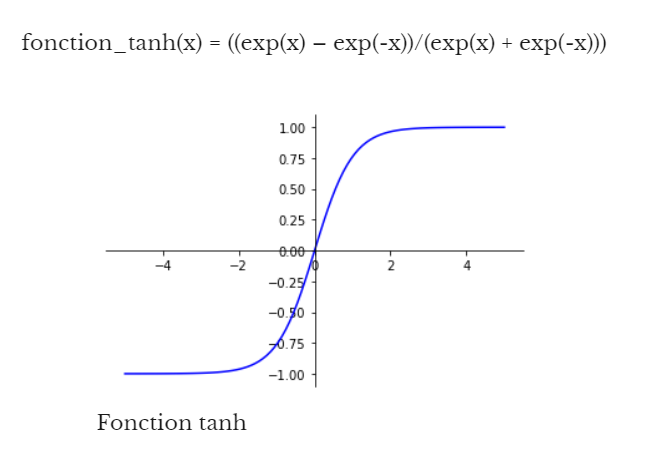


## ELU
La fonction Exponential Linear Unit (ELU) est une amélioration de ReLU car elle permet d’avoir des valeurs lisses lorsque x < 0.

Lorsque x < 0, ELU a des valeurs négatives différents de 0 (ce qui n’est pas le cas de ReLU). Cela permet de rapprocher la moyenne de la fonction de zéro.

Une moyenne plus proches de zéro permet un apprentissage plus rapide car cela rapprochent le gradient calculé du gradient naturel (un concept qui mérite un article entier).

Effectivement, plus x diminue, plus ELU saturent à une valeur négative. Cette saturation implique qu’ELU a une petite dérivée ce qui diminue la variation du résultat et donc l’information qui est propagée vers la couche suivante.



```
fonction_ELU(x) =

- if x > 0: x
- if x < 0: alpha * (exp(x) – 1)
avec :
alpha > 0
```
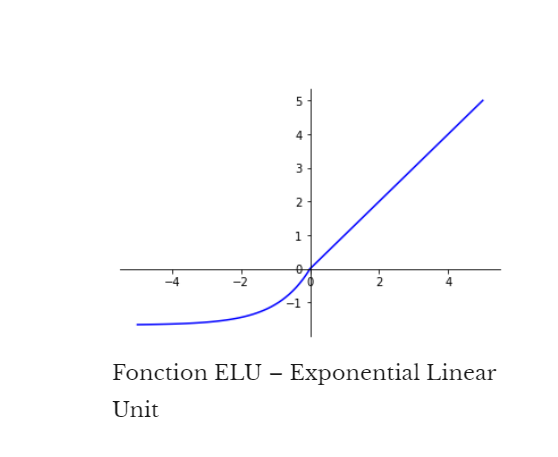



```
tf.keras.activations.elu(x, alpha=1.0)
```
- alpha: un scalaire, une variable, qui permet de contrôler la pente de ELU lorsque x < 0. Plus alpha est grand, plus la courbe est pentue. Ce scalaire doit est supérieur à 0 (alpha > 0)



## SELU
La fonction Scaled Exponential Linear Unit (SELU) est une optimisation de ELU.

Le principe est le même qu’avec ELU. On multiplie seulement le résultat de ELU par un scalaire. On pourrait l’écrire comme cela : fonction_SELU(x) = scale * fonction_ELU(x).

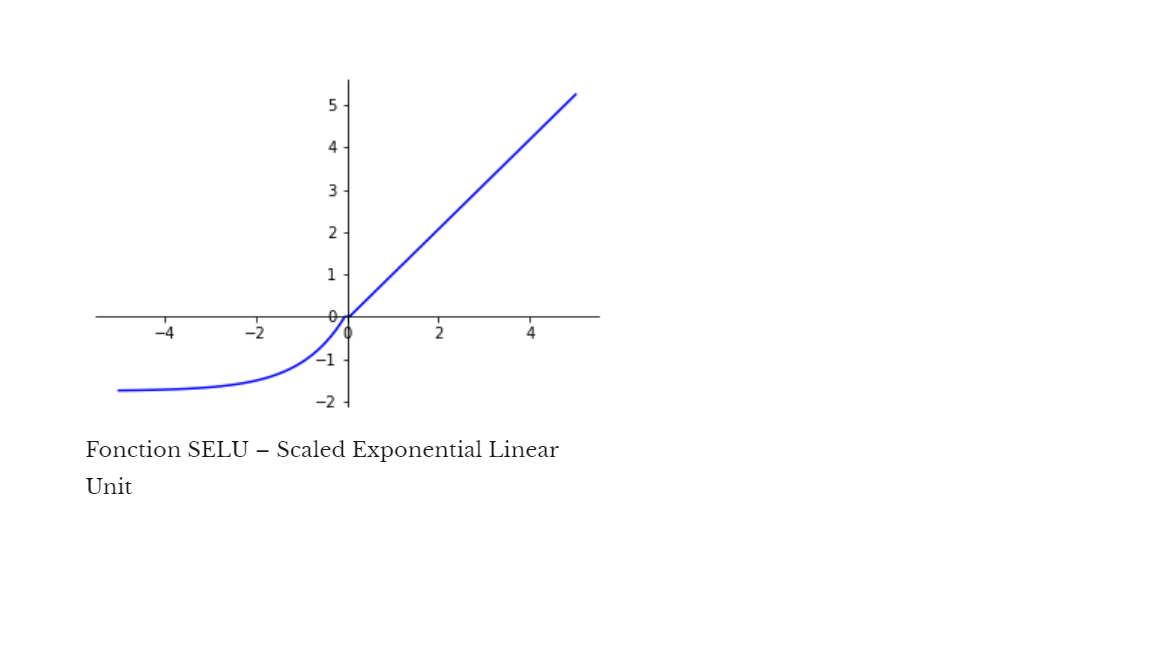


```
model.add(tf.keras.layers.Dense(64, kernel_initializer='lecun_normal', activation='selu'))
```



## Quelle fonction pour quel cas ?

Comme on l’a vu précédemment, plusieurs fonctions d’activation peuvent être utilisé dans un modèle selon le choix de l’utilisateur.

Néanmoins, la dernière fonction d’activation est essentielle car c’est elle qui permet de produire le résultat.

Ainsi, il faudra choisir la bonne fonction d’activation en fonction du type de problème auquel on a à faire.

On ne va pas prendre une fonction retournant une probabilité si notre problème de base est de trouver la valeur futur d’une action en Bourse.

C’est pourquoi nous avons mis à votre disposition ce tableau pour savoir quelle fonction d’activation utiliser dans la dernière couche de son modèle selon le type de problème.

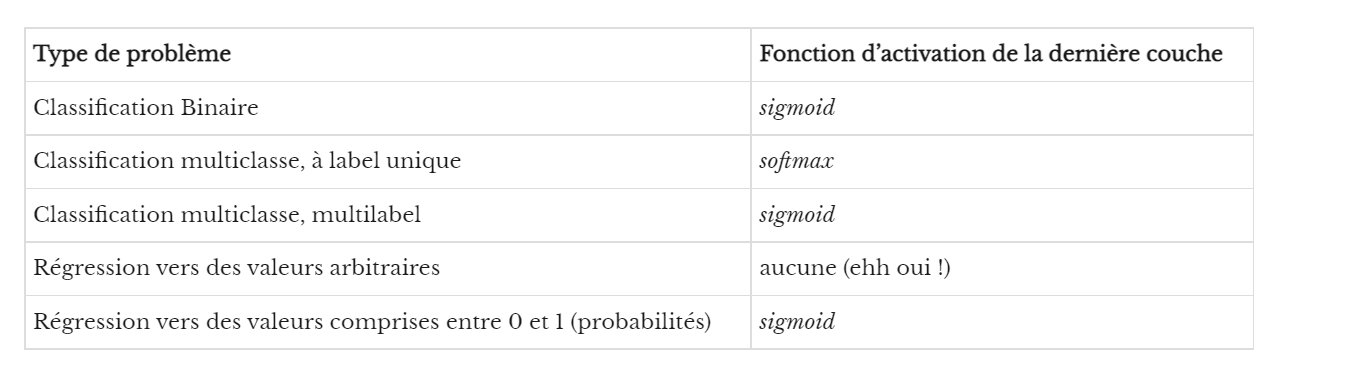

--------------------------------------------------------------------------------

In [11]:
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [12]:
# Une fois ces cellules exécutées, on peut faire un résumé de ce que l’on a :
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


Il faut maintenant compiler le modèle et comme toujours en machine learning, il faut faire des choix. On doit déterminer quelle méthode d’optimisation on veut utiliser pour trouver les poids. On doit choisir un fonction de perte et une fonction de mesure de la précision.

Ces choix sont aussi importants que le choix de l’architecture du réseau. La méthode d’optimisation influence la vitesse d’entrainement du réseau et les deux autres paramètres permettent d’évaluer les performances de notre modèle.

Voici ce que j’ai choisi pour ce modèle. Vous pouvez essayer de jouer sur les paramètres pour améliorer les résultats globaux. C’est un des meilleurs moyen pour apprendre !

In [13]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [14]:
# On peut maintenant commencer l’entrainement du réseau avec model.fit :
history = model.fit(images_train,
                    targets_train,
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4970 - accuracy: 0.8211 - val_loss: 0.4350 - val_accuracy: 0.8407
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3680 - accuracy: 0.8632 - val_loss: 0.3684 - val_accuracy: 0.8661
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3323 - accuracy: 0.8764 - val_loss: 0.3447 - val_accuracy: 0.8734
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3047 - accuracy: 0.8865 - val_loss: 0.3431 - val_accuracy: 0.8777
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2867 - accuracy: 0.8938 - val_loss: 0.3656 - val_accuracy: 0.8704
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.8970 - val_loss: 0.3289 - val_accuracy: 0.8848
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2594 - accuracy: 0.9016 - val_loss: 0.3485 - val_accuracy:

L’époque (epochs) correspond au nombre de passage effectués sur les poids. Plus il y a d’époques plus l’entrainement prendra de temps mais plus le modèle sera efficace. Attention à ne pas faire trop d’époques, c’est le meilleur moyen de tomber dans l’over-fitting.

validation_split est le paramètre qui permet de séparer les données d’entrainement et les données de test. Il est d’usage de prendre 20% de données de test et 80% de données d’entraînements.

## Résultats
Maintenant que le réseau est entraîné, nous pouvons regarder l’évolution de nos performances époque après époque. Cette étape est importante.

Elle permet d’abord de nous assurer que les résultats sont bons. Et elle peut aussi permettre de détecter un éventuel over-fitting.

history permet de stocker les valeurs de la perte et de la précision, à la fois sur les données d’entraînements (loss et acc) et sur les données de test (loss_val et acc_val).

C’est surtout les valeurs sur les données de test qui nous intéressent. Les valeurs sur les données d’entraînements sont toujours bonnes puisque c’est elles qui permettent de configurer le modèle.

Une fois que ces valeurs sont stockées dans des listes, on a plus qu’à les tracer avec plt.plot de matplotlib.

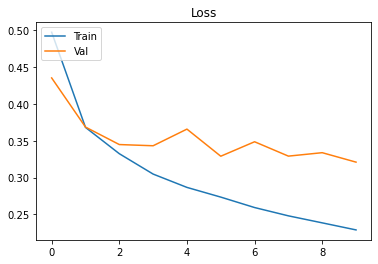

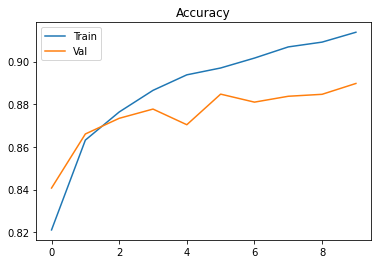

In [15]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

Après l’entraînement du modèle, et malgré la grande simplicité de celui-ci, nous avons des résultats déjà assez bons. 88% des images de test sont bien classées par le modèle. 10560 images sur 12000 au total ont été bien classés.

Rappelez-vous que nous avions garder de côté la base de test fournie par Tensorflow. Elle nous permet de confirmer nos résultats.

In [16]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.8817
Test Loss 0.34942328929901123
Test Accuracy 0.8816999793052673


Avec cette base on a 87,6% de réussite. C’est quasiment le même résultat.

On peut quand même essayer de faire mieux. Il reste quand même 12% d’erreurs.

## Fashion MNIST avec CNN

In [17]:
Fashion_mnist = tf.keras.datasets.fashion_mnist

data = tf.keras.datasets.fashion_mnist.load_data()

x_train = data[0][0]
y_train = data[0][1]

x_test = data[1][0]
y_test = data[1][1]

In [18]:
# Nos images sont sous la forme de vecteurs lignes, on va les mettre sous forme de vecteurs colonnes :

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# On normalise nos pixels :

x_train = x_train.astype('float')/255
x_test = x_test.astype('float')/255

In [19]:
# construction du réseau est le suivant :

model_cnn = tf.keras.Sequential()

model_cnn.add(tf.keras.layers.Conv2D(64, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=(28, 28, 1)))

model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_cnn.add(tf.keras.layers.Flatten())

model_cnn.add(tf.keras.layers.Dense(128, activation='relu'))

model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [20]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,182,154
Trainable params: 1,182,154
Non-trainable params: 0
_________________________________________________________________


In [21]:
# On reprend les mêmes paramètres d’optimisation et de performances :
model_cnn.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [23]:
# Nous allons entraîner le modèle sur 15 époques.
history = model_cnn.fit(x_train,
                    y_train,
                    epochs = 15,
                    validation_split = 0.2)

Epoch 1/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1417 - accuracy: 0.9467 - val_loss: 0.2600 - val_accuracy: 0.9107
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1188 - accuracy: 0.9560 - val_loss: 0.2842 - val_accuracy: 0.9086
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1006 - accuracy: 0.9627 - val_loss: 0.3073 - val_accuracy: 0.9079
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0831 - accuracy: 0.9691 - val_loss: 0.3137 - val_accuracy: 0.9133
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0721 - accuracy: 0.9742 - val_loss: 0.3510 - val_accuracy: 0.9060
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0606 - accuracy: 0.9781 - val_loss: 0.3994 - val_accuracy: 0.9068
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0507 - accuracy: 0.9820 - val_loss: 0.4431 - val_accuracy:

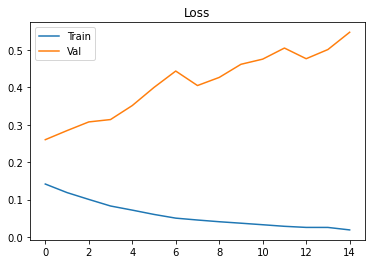

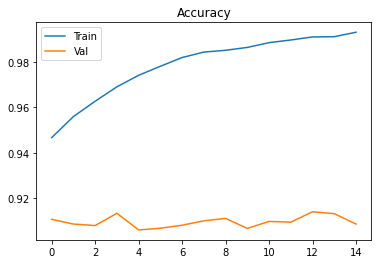

In [24]:
# On peut tracer les courbes d’évolution de la perte et de la précision :
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [25]:
# Vous pourriez observer de meilleurs résultats encore en prolongeant l’entraînement sur plus d’époques.
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.8817
Test Loss 0.34942328929901123
Test Accuracy 0.8816999793052673


## Calcul de la prédiction sur les données de test et matrice de confusion

In [26]:
model.predict(x_test)

array([[3.5219836e-09, 3.4389012e-09, 2.1857798e-07, ..., 1.3020087e-03,
        3.2005804e-10, 9.9860436e-01],
       [2.2604003e-05, 8.7577460e-13, 9.9948740e-01, ..., 4.5285621e-16,
        1.7198636e-10, 2.2378396e-13],
       [7.4837391e-13, 1.0000000e+00, 6.7961093e-17, ..., 4.3381575e-29,
        3.8989402e-18, 7.6163952e-24],
       ...,
       [6.1388544e-10, 7.6591714e-14, 8.0368961e-11, ..., 1.1716689e-12,
        9.9999940e-01, 4.3093357e-16],
       [9.6384472e-12, 1.0000000e+00, 3.6926704e-13, ..., 6.7546850e-15,
        5.1673641e-11, 4.5568741e-13],
       [1.2334938e-08, 2.1997110e-13, 5.7212879e-09, ..., 7.4736812e-07,
        9.2939549e-09, 1.4361979e-09]], dtype=float32)

In [27]:
predictions = []
prob_pred = model.predict(x_test)

for pred in prob_pred:
  predictions.append(np.argmax(pred))

predictions=np.array(predictions)

In [28]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Text(89.18, 0.5, 'Catégorie prédite')

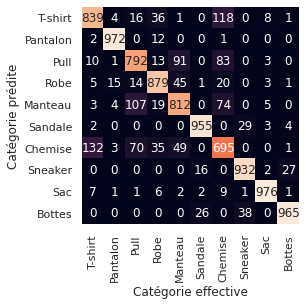

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.set()
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=targets_names, yticklabels=targets_names)
plt.xlabel('Catégorie effective')
plt.ylabel('Catégorie prédite')